In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Просмотр датафрейма
df = pd.read_csv('query_result_2021-11-27T15_38_02.783495Z.csv')
df

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,ticket_no,flight_id.1,fare_conditions,amount
0,136823,PG0480,2017-02-05T09:25:00Z,2017-02-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-05T09:27:00Z,2017-02-05T10:18:00Z,5.432054e+09,136823.0,Business,18900.0
1,136757,PG0480,2017-01-27T09:25:00Z,2017-01-27T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-27T09:30:00Z,2017-01-27T10:19:00Z,5.432054e+09,136757.0,Business,18900.0
2,136780,PG0480,2017-02-24T09:25:00Z,2017-02-24T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-24T09:30:00Z,2017-02-24T10:20:00Z,5.432377e+09,136780.0,Business,18900.0
3,136815,PG0480,2017-02-19T09:25:00Z,2017-02-19T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-19T09:26:00Z,2017-02-19T10:17:00Z,5.432376e+09,136815.0,Business,18900.0
4,136645,PG0480,2017-01-05T09:25:00Z,2017-01-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-05T09:29:00Z,2017-01-05T10:20:00Z,5.432375e+09,136645.0,Business,18900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-31T06:10:00Z,2017-01-31T11:14:00Z,NaN,NaN,NaN,NaN
12000,136511,PG0194,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,AAQ,NOZ,Arrived,733,2017-02-21T06:15:00Z,2017-02-21T11:25:00Z,NaN,NaN,NaN,NaN
12001,136540,PG0194,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,NaN,NaN,NaN,NaN
12002,136546,PG0194,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            12004 non-null  int64  
 1   flight_no            12004 non-null  object 
 2   scheduled_departure  12004 non-null  object 
 3   scheduled_arrival    12004 non-null  object 
 4   departure_airport    12004 non-null  object 
 5   arrival_airport      12004 non-null  object 
 6   status               12004 non-null  object 
 7   aircraft_code        12004 non-null  object 
 8   actual_departure     12004 non-null  object 
 9   actual_arrival       12004 non-null  object 
 10  ticket_no            11995 non-null  float64
 11  flight_id.1          11995 non-null  float64
 12  fare_conditions      11995 non-null  object 
 13  amount               11995 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.3+ MB


In [4]:
# Проверка на наличие пропусков
df.isna().sum()

flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
ticket_no              9
flight_id.1            9
fare_conditions        9
amount                 9
dtype: int64

In [5]:
# Удаление столбца flight_id.1,так как отбражением информации служит flight_id
df = df.drop(['flight_id.1'],axis = 1 )

In [6]:
# Заполнение пропусков в ticket_no
df.ticket_no.fillna('-', inplace=True)

In [7]:
# Заполнение пропусков в fare_conditions
df.fare_conditions.fillna('-', inplace=True)

In [8]:
# Заполнение пропусков в amount
df.amount.fillna('0', inplace=True)

In [9]:
# Получившийся результат на данный момент
df

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount
0,136823,PG0480,2017-02-05T09:25:00Z,2017-02-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-05T09:27:00Z,2017-02-05T10:18:00Z,5432053767.0,Business,18900.0
1,136757,PG0480,2017-01-27T09:25:00Z,2017-01-27T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-27T09:30:00Z,2017-01-27T10:19:00Z,5432053741.0,Business,18900.0
2,136780,PG0480,2017-02-24T09:25:00Z,2017-02-24T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-24T09:30:00Z,2017-02-24T10:20:00Z,5432376553.0,Business,18900.0
3,136815,PG0480,2017-02-19T09:25:00Z,2017-02-19T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-19T09:26:00Z,2017-02-19T10:17:00Z,5432376295.0,Business,18900.0
4,136645,PG0480,2017-01-05T09:25:00Z,2017-01-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-05T09:29:00Z,2017-01-05T10:20:00Z,5432374513.0,Business,18900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-31T06:10:00Z,2017-01-31T11:14:00Z,-,-,0
12000,136511,PG0194,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,AAQ,NOZ,Arrived,733,2017-02-21T06:15:00Z,2017-02-21T11:25:00Z,-,-,0
12001,136540,PG0194,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-17T06:14:00Z,2017-01-17T11:21:00Z,-,-,0
12002,136546,PG0194,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,-,-,0


In [10]:
# Превращение столбец actual_arrival str в datetime
df.actual_arrival = pd.to_datetime(df.actual_arrival)

In [11]:
# Превращение столбец actual_departure str в datetime
df.actual_departure = pd.to_datetime(df.actual_departure)

In [12]:
# Создание колонки длительности рейса
df['duration of the flight'] = df.actual_arrival - df.actual_departure
df

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,duration of the flight
0,136823,PG0480,2017-02-05T09:25:00Z,2017-02-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-05 09:27:00+00:00,2017-02-05 10:18:00+00:00,5432053767.0,Business,18900.0,0 days 00:51:00
1,136757,PG0480,2017-01-27T09:25:00Z,2017-01-27T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-27 09:30:00+00:00,2017-01-27 10:19:00+00:00,5432053741.0,Business,18900.0,0 days 00:49:00
2,136780,PG0480,2017-02-24T09:25:00Z,2017-02-24T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-24 09:30:00+00:00,2017-02-24 10:20:00+00:00,5432376553.0,Business,18900.0,0 days 00:50:00
3,136815,PG0480,2017-02-19T09:25:00Z,2017-02-19T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-02-19 09:26:00+00:00,2017-02-19 10:17:00+00:00,5432376295.0,Business,18900.0,0 days 00:51:00
4,136645,PG0480,2017-01-05T09:25:00Z,2017-01-05T10:15:00Z,AAQ,EGO,Arrived,SU9,2017-01-05 09:29:00+00:00,2017-01-05 10:20:00+00:00,5432374513.0,Business,18900.0,0 days 00:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-31 06:10:00+00:00,2017-01-31 11:14:00+00:00,-,-,0,0 days 05:04:00
12000,136511,PG0194,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,AAQ,NOZ,Arrived,733,2017-02-21 06:15:00+00:00,2017-02-21 11:25:00+00:00,-,-,0,0 days 05:10:00
12001,136540,PG0194,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-17 06:14:00+00:00,2017-01-17 11:21:00+00:00,-,-,0,0 days 05:07:00
12002,136546,PG0194,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,AAQ,NOZ,Arrived,733,2017-01-03 06:13:00+00:00,2017-01-03 11:15:00+00:00,-,-,0,0 days 05:02:00


In [15]:
# Превращения колонки str в float
df.amount = df.amount.astype('float')


In [69]:
# Создаем отдельный датафрейм для удобства анализа со столбцами arrival_airport,amount
df_loss = df[['arrival_airport', 'amount']]
df_loss

,arrival_airport,amount
0,EGO,18900.0
1,EGO,18900.0
2,EGO,18900.0
3,EGO,18900.0
4,EGO,18900.0
...,...,...
11999,NOZ,0.0
12000,NOZ,0.0
12001,NOZ,0.0
12002,NOZ,0.0


In [70]:
# Рейсы куда прилетают из Анапы
df_loss.arrival_airport.value_counts()

SVO    6674
EGO    5321
NOZ       9
Name: arrival_airport, dtype: int64

In [71]:
# Узнаем прибыль билетов рейса AAQ - SVO
SVO_sum_tikets = df_loss[df_loss.arrival_airport == 'SVO'].amount.sum()
SVO_sum_tikets

96912000.0

In [72]:
# Узнаем прибыль билетов рейса AAQ - EGO
EGO_sum_tikets = df_loss[df_loss.arrival_airport == 'EGO'].amount.sum()
EGO_sum_tikets

41915700.0

In [73]:
# Узнаем прибыль билетов рейса AAQ - NOZ
NOZ_sum_tikets = df_loss[df_loss.arrival_airport == 'NOZ'].amount.sum()
NOZ_sum_tikets

0.0

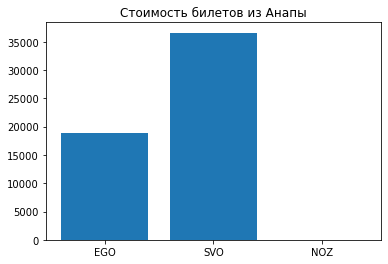

In [76]:
# Стоимость билетов из Анапы
plt.bar(x=df_loss['arrival_airport'],height=df_loss['amount'])
plt.title('Стоимость билетов из Анапы')
plt.show()

In [123]:
# Процент прибыли приносящий по продажи билетов AAQ - SVO
SVO = round((SVO_sum_tikets/df_loss.amount.sum())*100,2)
'{} %'.format(SVO)

'69.81 %'

In [124]:
# Процент прибыли приносящий по продажи билетов AAQ - EGO
EGO = round((EGO_sum_tikets/df_loss.amount.sum())*100,2)
'{} %'.format(EGO)

'30.19 %'

# Можно сделать вывод:
## 1)NOZ не имеет спроса
## 2)EGO обладает спросом по покупке билетов
## 3)SVO имеет высокий спрос по покупки билетов
# Вывод:AAQ - NOZ,является убыточным и от этого рейса нужно отказаться в это время года.